# Exploratory Data Analysis on Pima Indians Diabetes Dataset

This notebook explores the Pima-indians-diabetes dataset.

## Overview

Pima-indians-diabetes is a dataset about predicting the onset of diabetes mellitus based on certain diagnostic measurement.
.Number of instances (rows): 768
.Number of attributes (columns): 9 (8 features + 1 target label)

In [16]:
import numpy as np
import pandas as pd

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv('pima-indians-diabetes.data.csv', names=columns)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Shape of dataset: ",df.shape)
print("This is the first 5 rows of the dataset: ")
df.head()

Shape of dataset:  (768, 9)
This is the first 5 rows of the dataset: 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Meaning of columns

- **Pregnancies**: Number of times pregnant  

- **Glucose**: Plasma glucose concentration after 2 hours in an oral glucose tolerance test  

- **BloodPressure**: Diastolic blood pressure (mm Hg)  

- **SkinThickness**: Triceps skin fold thickness (mm)  

- **Insulin**: 2-Hour serum insulin (mu U/ml)  

- **BMI**: Body mass index (weight in kg/(height in m)^2)  

- **DiabetesPedigreeFunction**: Score representing likelihood of diabetes based on family history  

- **Age**: Age of the patient (years)  

- **Outcome**: Class variable (0 = no diabetes, 1 = diabetes)

**Outcome** column is the label of the dataset.


## Identification of variables and data types

The dataset contains 768 rows and 9 columns.  
From `df.info()`, we can see that all columns are numeric (7 are `int64`, 2 are `float64`), and there are no missing values reported.  

- **Predictor variables (8 numeric features):** Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.  
- **Target variable (1 binary categorical):** Outcome (0 = no diabetes, 1 = diabetes).  

Thus, the dataset consists mainly of numerical variables, with the target variable being binary.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Univariate Analysis

### Description

- **Numberic analysis:** We have eight attribiutes:
    - **Pregnancies** 
    - **Glucose**
    - **BloodPressuser**
    - **SkinThickness**
    - **Insullin**
    - **BMI**
    - **DiabetesPedigreeFunction**
    - **Age**

- **Categorical analysis:**
    - **Outcome**

### Numberic analysis

#### Non-graphical univariate analysis

##### Statistical summary

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

numeric_features = ["Pregnancies", "Glucose", "BloodPressure", 
                    "SkinThickness", "Insulin", "BMI", 
                    "DiabetesPedigreeFunction", "Age"]
# Statistical Summary
df[numeric_features].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


##### Distribution characteristics

In [4]:
for col in numeric_features:
    median_val = df[col].median()
    mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else "No mode"
    skewness = stats.skew(df[col])
    kurtosis = stats.kurtosis(df[col])
    
    print(f"{col}:")
    print(f"  Median: {median_val:.2f}")
    print(f"  Mode: {mode_val}")
    print(f"  Skewness: {skewness:.3f} ({'Right-skewed' if skewness > 0.5 else 'Left-skewed' if skewness < -0.5 else 'Approximately symmetric'})")
    print(f"  Kurtosis: {kurtosis:.3f} ({'Heavy-tailed' if kurtosis > 0 else 'Light-tailed'})")
    print()

Pregnancies:
  Median: 3.00
  Mode: 1
  Skewness: 0.900 (Right-skewed)
  Kurtosis: 0.150 (Heavy-tailed)

Glucose:
  Median: 117.00
  Mode: 99
  Skewness: 0.173 (Approximately symmetric)
  Kurtosis: 0.629 (Heavy-tailed)

BloodPressure:
  Median: 72.00
  Mode: 70
  Skewness: -1.840 (Left-skewed)
  Kurtosis: 5.139 (Heavy-tailed)

SkinThickness:
  Median: 23.00
  Mode: 0
  Skewness: 0.109 (Approximately symmetric)
  Kurtosis: -0.524 (Light-tailed)

Insulin:
  Median: 30.50
  Mode: 0
  Skewness: 2.268 (Right-skewed)
  Kurtosis: 7.160 (Heavy-tailed)

BMI:
  Median: 32.00
  Mode: 32.0
  Skewness: -0.428 (Approximately symmetric)
  Kurtosis: 3.261 (Heavy-tailed)

DiabetesPedigreeFunction:
  Median: 0.37
  Mode: 0.254
  Skewness: 1.916 (Right-skewed)
  Kurtosis: 5.551 (Heavy-tailed)

Age:
  Median: 29.00
  Mode: 22
  Skewness: 1.127 (Right-skewed)
  Kurtosis: 0.631 (Heavy-tailed)



#### Graphical univariate analysis

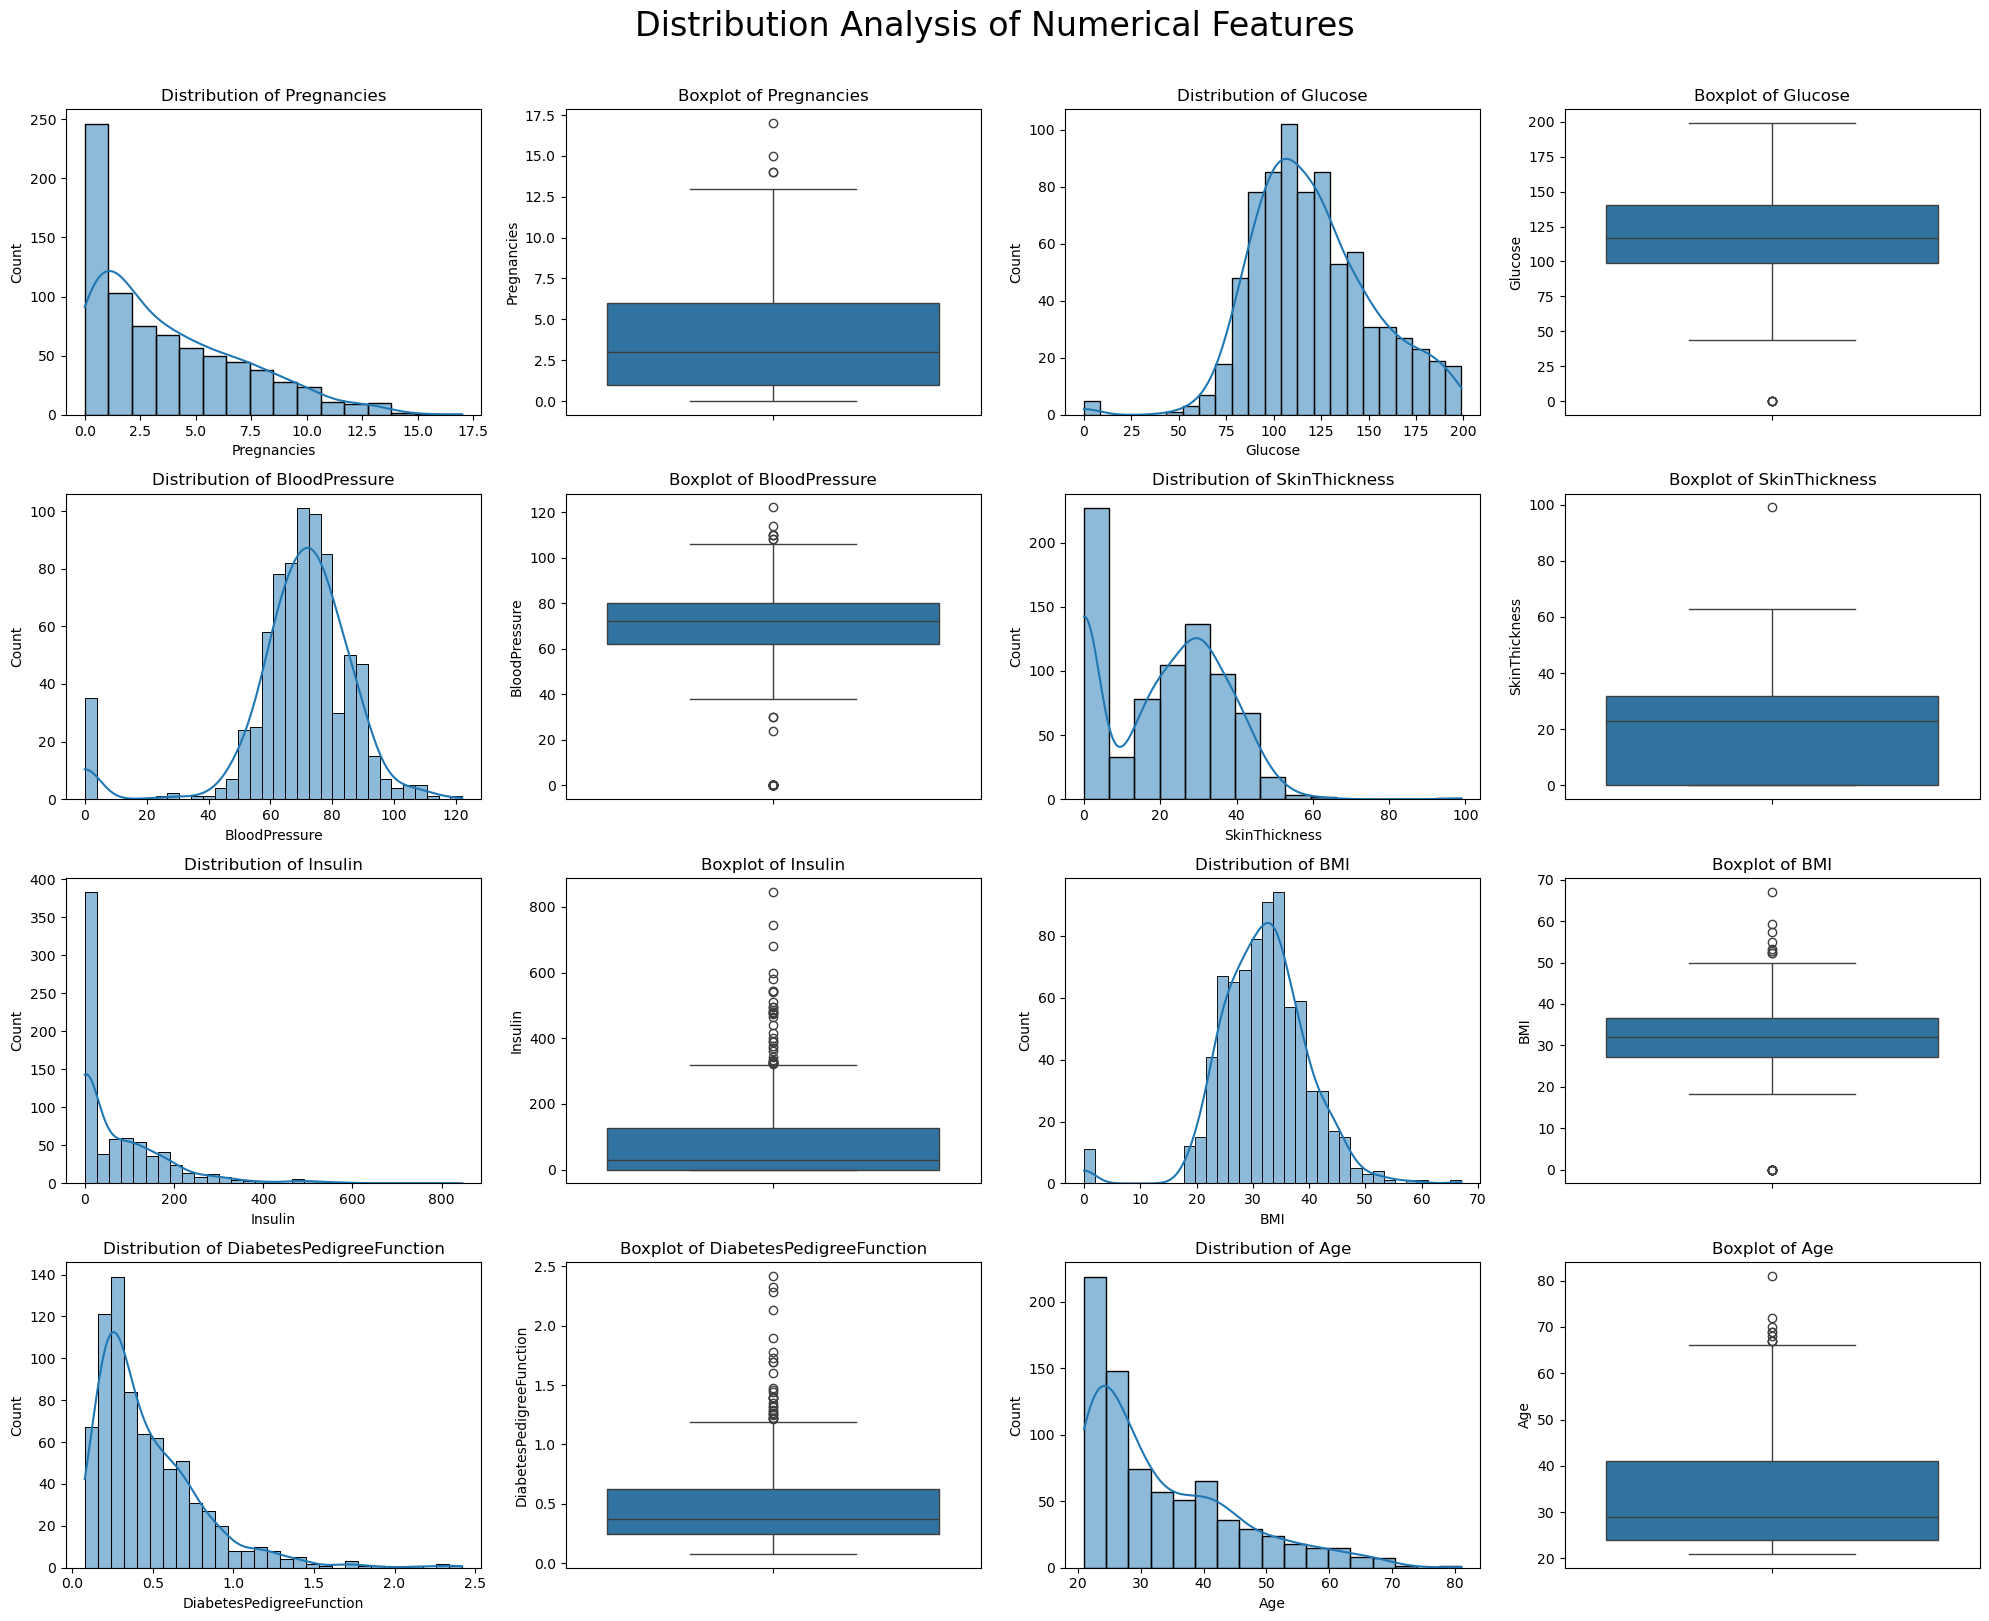

In [5]:
# Create organized subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle('Distribution Analysis of Numerical Features', fontsize=24, y=1.01)

for i, col in enumerate(numeric_features):
    # Histogram
    row, col_idx = i // 2, (i % 2) * 2
    sns.histplot(df[col], kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    
    # Boxplot
    sns.boxplot(y=df[col], ax=axes[row, col_idx + 1])
    axes[row, col_idx + 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### Categorical analysis

#### Non-graphical univariate analysis

In [6]:
# Basic statistics
outcome_counts = df['Outcome'].value_counts().sort_index()
outcome_percentages = df['Outcome'].value_counts(normalize=True).sort_index() * 100

print("Class Distribution:")
print(f"No Diabetes (0): {outcome_counts[0]} samples ({outcome_percentages[0]:.1f}%)")
print(f"Diabetes (1): {outcome_counts[1]} samples ({outcome_percentages[1]:.1f}%)")
print(f"Total samples: {len(df)}")

# Class imbalance ratio
imbalance_ratio = outcome_counts[0] / outcome_counts[1]
print(f"Class imbalance ratio (No Diabetes : Diabetes): {imbalance_ratio:.2f}:1")

# Determine if dataset is imbalanced
if imbalance_ratio > 1.5 or imbalance_ratio < 0.67:
    print("Dataset shows class imbalance - consider resampling techniques")
else:
    print("Dataset is relatively balanced")

Class Distribution:
No Diabetes (0): 500 samples (65.1%)
Diabetes (1): 268 samples (34.9%)
Total samples: 768
Class imbalance ratio (No Diabetes : Diabetes): 1.87:1
Dataset shows class imbalance - consider resampling techniques


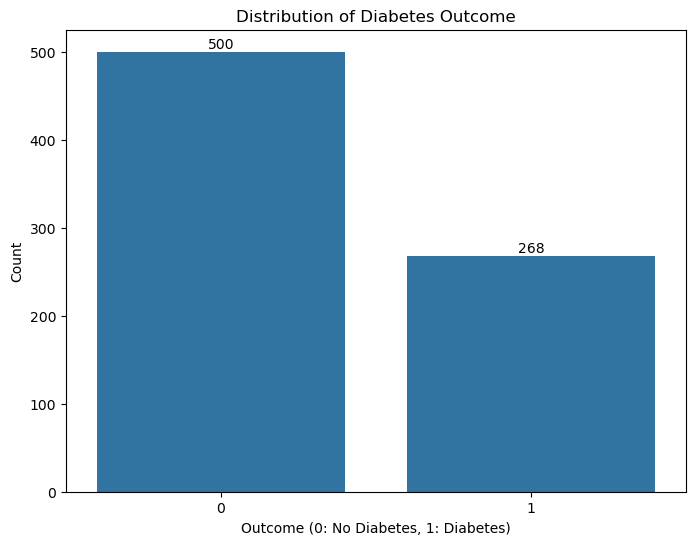

In [7]:
# Simple bar chart version
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outcome')
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')

# Add count labels
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container)

plt.show()

### Summary

- Most of the data's distribution is acceptable in order to be used for model training since Skewness and Kurtosis values of dataset features are in the accept value range (Skewness: -2 < x < 2; Kurtosis: -7 < x < 7), except Insulin data distribution, which needs some transformations (log, square root, Box–Cox,...).
- Graphical Numberic Analysis: don't know
- The dataset show it's imbalance, which is the problem needed to be dealt with

## Bivariate Analysis

Not done yet...

### Summary

## Detect anomalies values

### Description

This section focus on identifying physiologically impossible values or highly unrealistic values within the dataset that may indicate data collection errors or missing value encoding issues.

Based on medical literature and physiological constraints, the following ranges represent realistic values for each feature:

- **Pregnancies: x ≥ 0**: Negative pregnancy counts are impossible.

- **Glucose: 50 ≤ x ≤ 500 mg/dL**: Values below 50 mg/dL typically indicate severe hypoglycemia requiring immediate medical intervention, while values above 500 mg/dL represent extreme hyperglycemia that would likely be fatal without treatment. Zero values are impossible for living subjects.

- **BloodPressure: 40 ≤ x ≤ 200 mmHg**: Diastolic blood pressure below 40 mmHg or above 200 mmHg represents extreme physiological conditions incompatible with normal life. Zero values are impossible for living subjects.

- **SkinThickness: 5 ≤ x ≤ 50 mm**: Triceps skinfold thickness below 5 mm or above 50 mm is extremely rare, even in cases of severe malnutrition or morbid obesity. Zero values are physiologically impossible.

- **Insulin: x ≥ 2 μU/ml**: Serum insulin levels cannot be negative. Values below 2 μU/ml are extremely rare even in Type 1 diabetes patients. Zero values likely indicate missing data rather than true measurements.

- **BMI: 10 ≤ x ≤ 70**: BMI values below 10 kg/m² are incompatible with life, while values above 70 kg/m² are extraordinarily rare even in cases of extreme obesity. Zero values are impossible.

- **DiabetesPedigreeFunction: x ≥ 0**: This is a calculated score representing genetic predisposition to diabetes based on family history. Negative values would be meaningless in this context.

- **Age: x > 0**: Age values must be positive integers. Zero or negative values are impossible.


### Detection

#### Detection of impossible value

In [8]:
# Check for zeros in features where zero is impossible
zero_checks = {
    'Pregnancies': (df['Pregnancies'] < 0),
    'Glucose': (df['Glucose'] <= 0),
    'BloodPressure': (df['BloodPressure'] <= 0), 
    'SkinThickness': (df['SkinThickness'] <= 0),
    'Insulin': (df['Insulin'] <= 0),
    'BMI': (df['BMI'] <= 0),
    'Age': (df['Age'] <= 0)
}

for feature, condition in zero_checks.items():
    count = condition.sum()
    percentage = (count / len(df)) * 100
    print(f"{feature}: {count} zero values ({percentage:.1f}%)")

Pregnancies: 0 zero values (0.0%)
Glucose: 5 zero values (0.7%)
BloodPressure: 35 zero values (4.6%)
SkinThickness: 227 zero values (29.6%)
Insulin: 374 zero values (48.7%)
BMI: 11 zero values (1.4%)
Age: 0 zero values (0.0%)


#### Detection of extreme values

In [9]:
# Check for values outside physiologically reasonable ranges
extreme_checks = {
    'Glucose': ((df['Glucose'] > 0) & (df['Glucose'] < 50)) | (df['Glucose'] > 500),
    'BloodPressure': ((df['BloodPressure'] > 0) & (df['BloodPressure'] < 40)) | (df['BloodPressure'] > 200),
    'SkinThickness': ((df['SkinThickness'] > 0) & (df['SkinThickness'] < 5)) | (df['SkinThickness'] > 50),
    'Insulin': ((df['Insulin'] > 0) & (df['Insulin'] < 2)) | (df['Insulin'] > 1000),
    'BMI': ((df['BMI'] > 0) & (df['BMI'] < 10)) | (df['BMI'] > 70),
    'DiabetesPedigreeFunction': (df['DiabetesPedigreeFunction'] < 0),
}

for feature, condition in extreme_checks.items():
    count = condition.sum()
    percentage = (count / len(df)) * 100
    print(f"{feature}: {count} extreme values ({percentage:.1f}%)")

Glucose: 1 extreme values (0.1%)
BloodPressure: 4 extreme values (0.5%)
SkinThickness: 9 extreme values (1.2%)
Insulin: 0 extreme values (0.0%)
BMI: 0 extreme values (0.0%)
DiabetesPedigreeFunction: 0 extreme values (0.0%)


### Summary

- There are numorous anomalies values in this dataset
- Insulin column has the largest proportion of anomalies values (48.7%)

## Detect outliers

Not done yet

## Phần của Tú làm mà tôi chưa check/sửa lại

In [10]:
# Các cột có giá trị 0 không hợp lý
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Thay thế 0 bằng NaN
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Kiểm tra số lượng NaN
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [11]:
#Xử lý NaN (thay bằng median)
for col in cols_with_zeros:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [12]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age     Outcome
count   768.000000  768.000000     768.000000     768.000000  768.000000  768.000000                768.000000  768.000000  768.000000
mean      3.845052  121.656250      72.386719      29.108073  140.671875   32.455208                  0.471876   33.240885    0.348958
std       3.369578   30.438286      12.096642       8.791221   86.383060    6.875177                  0.331329   11.760232    0.476951
min       0.000000   44.000000      24.000000       7.000000   14.000000   18.200000                  0.078000   21.000000    0.000000
25%       1.000000   99.750000      64.000000      25.000000  121.500000   27.500000                  0.243750   24.000000    0.000000
50%       3.000000  117.000000      72.000000      29.000000  125.000000   32.300000                  0.372500   29.000000    0.000000
75%       6.000000  140.250000      80.000000      32.0

<Axes: xlabel='Outcome', ylabel='Glucose'>

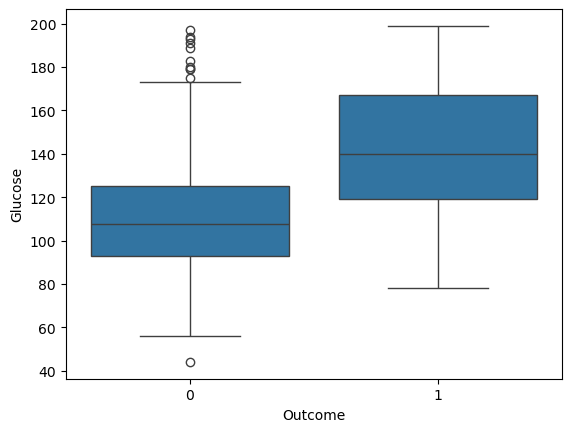

In [13]:
#Phân tích nhị biến (Bivariate Analysis)
sns.boxplot(x='Outcome', y='Glucose', data=df)


<Axes: xlabel='Age', ylabel='BMI'>

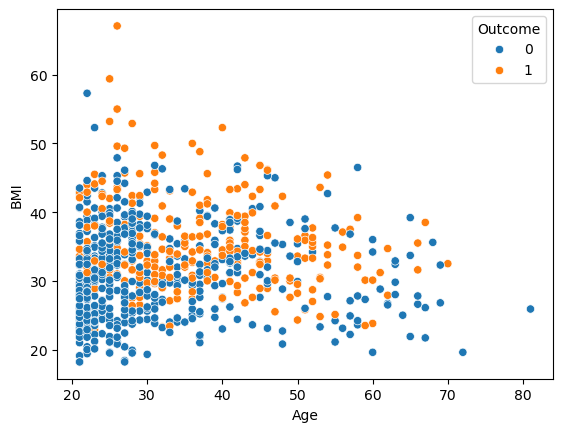

In [14]:
#Biểu đồ phân tán
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=df)


<Axes: >

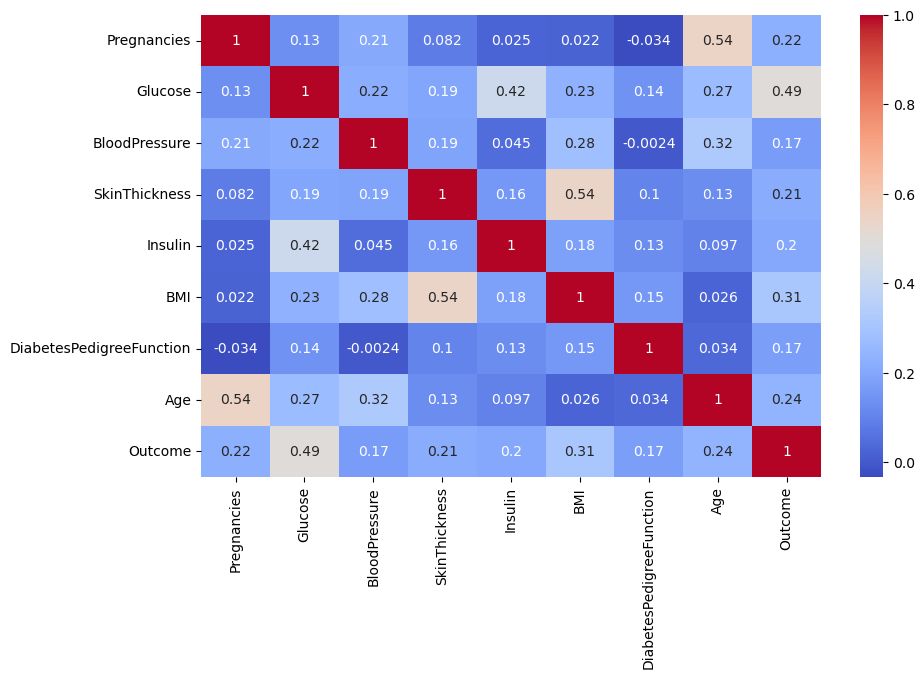

In [15]:
#Ma trận tương quan
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
